In [27]:
from Parser import Parser

import numpy as np
import matplotlib.pyplot as plt
class PlotController:
    #'ID': 0, 'position.x': 1, 'position.y': 2, 'position.z': 3,
    #'total_volume': 4, 'cell_type': 5, 'cycle_model': 6, 'current_phase': 7,
    #'elapsed_time_in_phase': 8, 'nuclear_volume': 9, 'cytoplasmic_volume': 10,
    #'fluid_fraction': 11, 'calcified_fraction': 12, 'orientation.x': 13,
    #'orientation.y': 14, 'orientation.z': 15, 'polarity': 16,
    #'migration_speed': 17, 'motility_vector.x': 18, 'motility_vector.y': 19,
    #'motility_vector.z': 20, 'migration_bias': 21, 'motility_bias_direction.x': 22,
    #'motility_bias_direction.y': 23, 'motility_bias_direction.z': 24,
    #'persistence_time': 25, 'motility_reserved': 26, 'oncoprotein': 27

    #over-time values
    #population values


    averageTimeInPhase =[]
    def __init__(self, fm):
        
        self.framecount = fm.getFrameCount()
        self.totalPop = np.zeros((self.framecount))
        self.healthyCount = np.zeros((self.framecount))
        self.starvedCount = np.zeros((self.framecount))
        self.deadCount = np.zeros((self.framecount))
        
        for i in range(self.framecount):
            cells = np.array(fm.getFrame(i).cells.data)
            self.totalPop[i]=cells[0].size
            self.healthyCount[i]=np.count_nonzero(cells[6] == 5)
            self.starvedCount[i]=np.count_nonzero(cells[6] == 101)
            self.deadCount[i]=np.count_nonzero(cells[6] == 100)
            
    def plotPop(self):
        plt.plot(self.totalPop, color = "c", label='total population')
        plt.plot(self.healthyCount,color = "b", label='healthy cells')
        plt.plot(self.starvedCount,color = "r",  label='starved cells')
        plt.plot(self.deadCount,color = "k", label='dead cells')
        plt.ylabel('# of cells')
        plt.xlabel('frame number')
        plt.legend()
        plt.show()
        


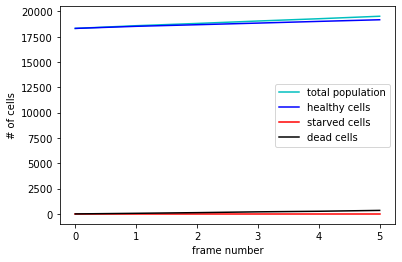

In [28]:
PlotController(Parser("./sample-output-3d")).plotPop()

In [ ]:
class OxygenGraph:
    